In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn


In [1]:
from sklearn.datasets import make_circles
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)


In [4]:
df = pd.DataFrame(data = X,columns = ['c1','c2'])
df

,c1,c2
0,1.082878,-0.117835
1,0.246395,-0.960409
2,-0.347656,0.404517
3,0.365008,-0.309962
4,0.131530,-1.028899
...,...,...
295,-0.101925,0.450795
296,-0.348394,0.343561
297,-0.675514,-0.734762
298,-0.351143,-0.984829


<Axes: xlabel='c1', ylabel='c2'>

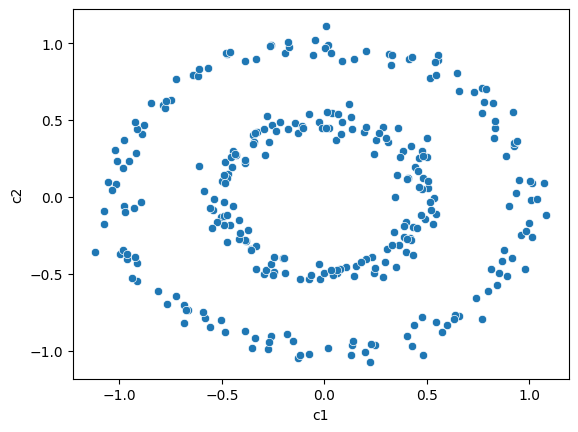

In [5]:
sns.scatterplot(data = df,x = 'c1',y = 'c2')

# DBSCAN model


In [7]:
from sklearn.cluster import DBSCAN

In [6]:
epsilon = np.linspace(0.1,1,10)
epsilon

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [9]:
number_of_outliers = []
for i in epsilon:
  model = DBSCAN(eps=i)
  labels = model.fit_predict(X)
  outlier = np.sum(model.labels_ == -1)
  number_of_outliers.append(outlier)

In [10]:
number_of_outliers

[np.int64(50),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0)]

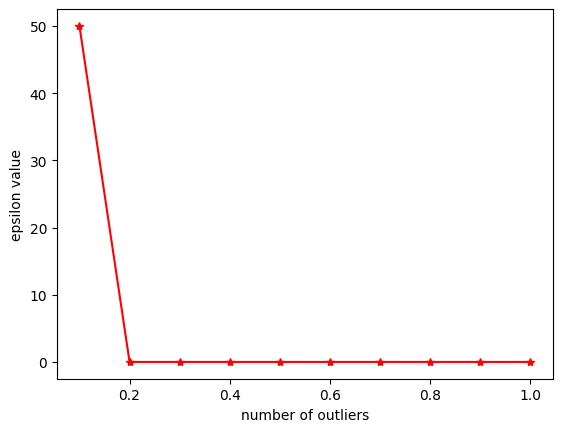

In [16]:
plt.plot(epsilon,number_of_outliers,marker = '*',color = 'red')
plt.xlabel('number of outliers')
plt.ylabel('epsilon value')
plt.show()

In [25]:
final_model = DBSCAN(eps=0.2)
labels = final_model.fit_predict(X)


<Axes: xlabel='c1', ylabel='c2'>

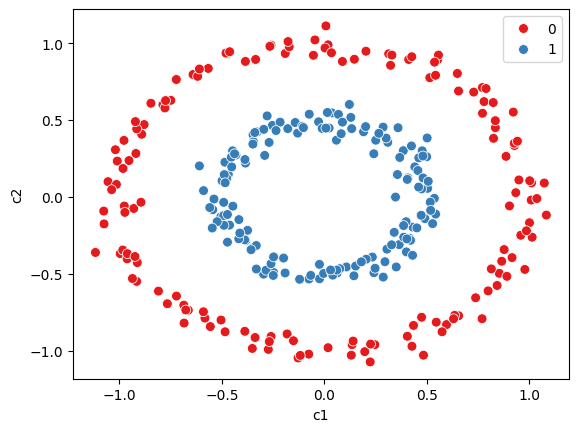

In [26]:
sns.scatterplot(data = df, x= 'c1',y = 'c2',hue = labels,s = 50,palette='Set1')

<Axes: xlabel='c1', ylabel='c2'>

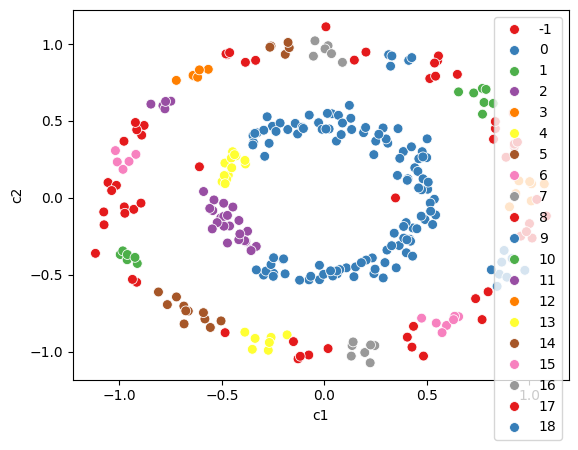

In [29]:
final_model = DBSCAN(eps=0.1)
labels = final_model.fit_predict(X)
sns.scatterplot(data = df, x= 'c1',y = 'c2',hue = labels,s = 50,palette='Set1')
